# 1. importing the libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

# 2. load the dataset

In [ ]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


# 3. Dropping certain features

Removing unwanted features (or columns)

In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

# 4. label Encoding


 Label Encoding is a method of converting categorical variables (strings or labels) into numeric values so that machine learning models can process them effectively, as most models require numeric inputs.

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# 5. splitting data set into train and test set

We split the dataset into training set and test set for training the model and for predicting the scores.

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Feature scaling

Min-Max Scaling is a common technique for normalizing data, especially when features have different ranges.

Feature scaling is the process of normalizing or standardizing the range of independent variables (features) in a dataset.

 The MinMaxScaler scales features to a specified range, typically [0, 1], which is useful for algorithms that rely on the scale of data, such as gradient-based methods or distance-based methods.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Neural networks usage


The neural network defined in the code is a Fully Connected Feedforward Neural Network (FNN), also known as a Multilayer Perceptron (MLP).

**Keras** is a powerful and user-friendly deep learning API that simplifies the process of building and training models.

**Feedforward Neural Network (FNN):**
This is a type of artificial neural network where the data flows in one direction: from the input layer, through hidden layers, to the output layer.

ReLU is used in the hidden layers of your neural network to introduce nonlinearity and enable the model to learn complex patterns from the cricket data.

ReLU is a popular and effective activation function due to its ability to introduce nonlinearity, computational efficiency

In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

Huber loss is often preferred over MSE in regression tasks when you suspect your data might have outliers.

For errors (differences between predicted and actual values) that are less than delta, the Huber loss is calculated like Mean Squared Error (MSE), making it sensitive to smaller errors.
For errors greater than delta, it behaves like Mean Absolute Error (MAE), making it less sensitive to large errors or outliers in your data.

# 8. Model training

Train the neural network model on the training data.

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 53.9751 - val_loss: 22.1194
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.3485 - val_loss: 21.9932
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.3663 - val_loss: 21.9243
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 22.3727 - val_loss: 21.8858
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 22.2101 - val_loss: 21.8627
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.0634 - val_loss: 22.0403
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 22.1442 - val_loss: 22.3375
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.2713 - val_loss: 21.8595
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.1883 - val_loss: 21.8999
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.2246 - val_loss: 22.6222


plotting

visualizing the training history of the model by plotting the loss values over the epochs.

<Axes: >

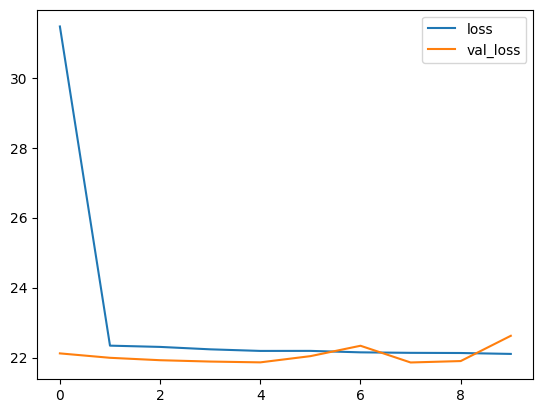

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# 9. Making predictions And Evaluating performance

Making predictions with the trained model and evaluate the performance of those predictions using two common regression metrics: **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)**.

mean_absolute_error is a function from the sklearn.metrics module that calculates the Mean Absolute Error (MAE) between the true values (y_test) and the predicted values (predictions).

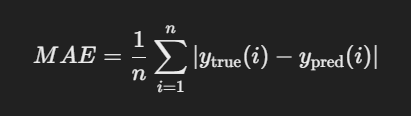

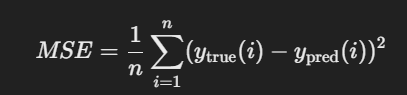

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

#it gives the error occured between predicted score and actual score

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


23.116732466249605

# 10. Interactive Score Prediction Interface with Widgets


 Gives interactive interface using ipywidgets to allow a user to input features and predict a score using the trained neural network model. The widgets (dropdowns and buttons) allow the user to select different values for the game scenario, and then the model will predict the score based on the selected inputs.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Roya…

Dropdown(description='Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Darede…

Dropdown(description='Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Ha…

Dropdown(description='Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White'…

Button(description='Predict Score', style=ButtonStyle())

Output()

# 11. Data Analysis

In [ ]:
# Summary statistics
print(ipl.describe())
# Null values check
print(ipl.isnull().sum())
# Plot distributions


                mid          runs       wickets         overs   runs_last_5  \
count  76014.000000  76014.000000  76014.000000  76014.000000  76014.000000   
mean     308.627740     74.889349      2.415844      9.783068     33.216434   
std      178.156878     48.823327      2.015207      5.772587     14.914174   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      154.000000     34.000000      1.000000      4.600000     24.000000   
50%      308.000000     70.000000      2.000000      9.600000     34.000000   
75%      463.000000    111.000000      4.000000     14.600000     43.000000   
max      617.000000    263.000000     10.000000     19.600000    113.000000   

       wickets_last_5       striker   non-striker         total  
count    76014.000000  76014.000000  76014.000000  76014.000000  
mean         1.120307     24.962283      8.869287    160.901452  
std          1.053343     20.079752     10.795742     29.246231  
min          0.000000   

Plot

Total runs scored by Batting team

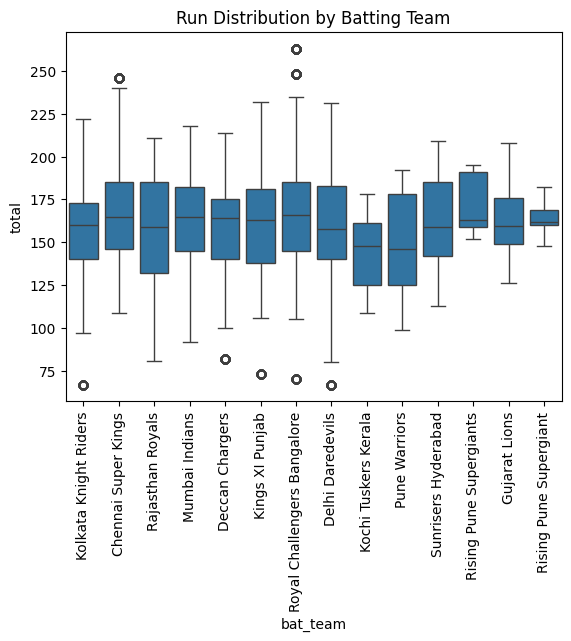

In [ ]:
sns.boxplot(x='bat_team', y='total', data=ipl)
plt.title('Run Distribution by Batting Team')
plt.xticks(rotation=90)
plt.show()

Adding a new feature, venue_avg_score, to the DataFrame, representing the average runs scored at each venue in the last 5 matches

In [ ]:
# Add a feature for average runs scored at the venue in the last 5 matches
venue_avg_score = ipl.groupby('venue')['total'].rolling(5).mean().reset_index(0, drop=True)
df['venue_avg_score'] = venue_avg_score

Fill missing values

In [ ]:
# Fill missing values in new features if any
# Only include numeric columns in the mean calculation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 12. Enhanced Neural Network Model with Batch Normalization and Dropout for Regression

It defines a neural network model for regression using Keras, with added regularization techniques for improved generalization.

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),    #Normalizes the outputs of the previous layer.
    keras.layers.Dropout(0.3),            #Randomly sets 30% of the neurons in the previous layer to zero during training.
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='linear')     #A single neuron output layer for regression tasks.
])

# 13. Hyper-parameter tuning

**Hyperparameter tuning** is the process of finding the optimal values for the hyperparameters of a machine learning model.

**Hyperparameters** are settings that control the learning process of a machine learning model. They are not learned from the data itself but are set before training begins.
Examples of hyperparameters: learning rate, number of hidden layers, number of neurons in each layer, batch size, epochs, activation functions, and regularization parameters.

**Scikeras** is a library that bridges Keras/TensorFlow with Scikit-learn, allowing Keras models to be used seamlessly within Scikit-learn's API. It provides wrappers like KerasRegressor and KerasClassifier to integrate deep learning models into the Scikit-learn ecosystem.

In [ ]:
!pip install scikeras

KerasRegressor is a wrapper class provided by the scikeras library. Its primary purpose is to make Keras models (which are primarily designed for deep learning) compatible with the Scikit-learn API.

In [ ]:
from scikeras.wrappers import KerasRegressor # Import KerasRegressor from scikeras.wrappers
from sklearn.model_selection import GridSearchCV
import tensorflow as tf # Import tensorflow for keras

def create_model(optimizer='adam'):
    model = tf.keras.Sequential([ # Use tf.keras.Sequential for model creation
        tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Use tf.keras.layers for layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(build_fn=create_model) # Create KerasRegressor instance
param_grid = {'batch_size': [32], 'epochs': [5], 'optimizer': ['adam']}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

Epoch 1/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11509.2520
Epoch 2/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1313.9595
Epoch 3/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 915.1653
Epoch 4/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 863.9063
Epoch 5/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 868.8624
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 11376.8525
Epoch 2/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1328.9336
Epoch 3/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 944.7400
Epoch 4/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 854.7569
Epoch 5/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 856.6562
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Epoch 1/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11652.0039
Epoch 2/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1290.9817
Epoch 3/5
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 889.6306

# 14. Evaluating Model Performance Using MSE, MAE, and R² Score



In [ ]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 880.1032004380558
Mean Absolute Error: 23.116732466249605
R^2 Score: -0.043538451194763184


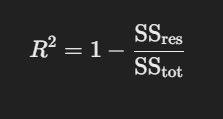

# 15. Improved user interface

In [ ]:
overs = widgets.FloatSlider(value=10.0, min=0.1, max=20.0, step=0.1, description='Overs:')
#10 overs bowled. min=0.1 to 20 because it is a T20 match . 0.1 step for each ball

wickets = widgets.IntSlider(value=0, min=0, max=10, step=1, description='Wickets:')
#0 to 10 wickets step increase by 1

runs = widgets.IntSlider(value=0, min=0, max=100, step=1, description='Runs:')

striker_runs = widgets.IntSlider(value=0, min=0, max=100, step=1, description='Striker Runs:')
non_striker_runs = widgets.IntSlider(value=0, min=0, max=100, step=1, description='Non-striker Runs:')
bowler_runs = widgets.IntSlider(value=0, min=0, max=100, step=1, description='Bowler Runs:')
#0 to 100 runs step increase by 1

# 16. Predicting Total Score with User Input and Model

In [ ]:
def predict_score_with_details(b):
    with output:
        clear_output()
        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input = input.reshape(1, -1)
        input = scaler.transform(input)   #scaled into MinMaxScaler
        predicted_score = model.predict(input)        #The preprocessed input data is passed through the trained model to get a predicted score.
        predicted_score = int(predicted_score[0, 0])      #The predicted score is then converted to an integer for easier readability

        print(f"Predicted Score: {predicted_score} (±10 runs)")


# 17. Export trained model

It sets up a simple neural network for predicting cricket scores, then trains it and saves the trained model in the Keras format.

In [ ]:
# Import necessary libraries
from tensorflow import keras                               # keras: Part of TensorFlow, used for creating and training deep learning models.
from tensorflow.keras.layers import Dense                  # Dense: A fully connected layer in a neural network
from scikeras.wrappers import KerasRegressor               # A wrapper from scikeras that allows using Keras models with scikit-learn's API

# Define the model building function
def model_build_fn():
    """
    Creates and compiles a Keras model.

    Returns:
        keras.Model: The compiled Keras model.
    """
    model = keras.Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input shape based on X
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Use KerasRegressor
model = KerasRegressor(build_fn=model_build_fn, epochs=10, batch_size=32)

# Fit the model
model.fit(X, y)

# Save the model in the native Keras format
keras_model = model.model_  # Access the fitted Keras model
keras_model.save('ipl_score_prediction_model.keras')  # Save in the new format


Epoch 1/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2712.5447
Epoch 2/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1207.3906
Epoch 3/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 920.1810
Epoch 4/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 902.9688
Epoch 5/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 894.0174
Epoch 6/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 878.3727
Epoch 7/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 888.3066
Epoch 8/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 870.3375
Epoch 9/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 861.7887
Epoch 10/10
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 860.3145


# 18. Actual vs Predicted scores

creating a DataFrame for comparing the actual scores (y_test) with the predicted scores (predictions) from the trained neural network model.

In [ ]:
# Create a DataFrame for comparison
import pandas as pd
predictions = model.model_.predict(X_test_scaled)  # Use the final fitted Keras model
results = pd.DataFrame({
    'Actual Score': y_test.values,                 # stores actual values
    'Predicted Score': predictions.flatten()       # stores predicted values
})
results.head(10)  # Display the first 10 rows


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Actual Score,Predicted Score
0,134,142.477066
1,195,144.142471
2,183,143.522568
3,183,144.281647
4,193,144.301132
5,136,142.645889
6,186,143.596054
7,176,140.433334
8,148,144.422363
9,135,142.715805


This allows users to input match details (venue, two teams) and get predictions for the scores of both innings, as well as the winner of the match. It uses the trained neural network model to make these predictions based on the input data.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets for inputs
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Venue:')
team1 = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Team 1:')
team2 = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Team 2:')

# Predict Button
predict_button = widgets.Button(description="Predict Scores and Winner")
output = widgets.Output()

# Prediction and Winner Declaration Function
def predict_scores_and_winner(b):
    with output:
        clear_output()  # Clear previous output

        # Encode the input data
        encoded_venue = venue_encoder.transform([venue.value])[0]
        team1_encoded = batting_team_encoder.transform([team1.value])[0]
        team2_encoded = bowling_team_encoder.transform([team2.value])[0]

        # Add placeholder values for striker and bowler (since we don't need them)
        placeholder_striker = 0  # Using 0 for missing striker
        placeholder_bowler = 0  # Using 0 for missing bowler

        # First-innings Prediction: Team 1 batting, Team 2 bowling
        first_innings_input = [[encoded_venue, team1_encoded, team2_encoded, placeholder_striker, placeholder_bowler]]
        first_innings_scaled = scaler.transform(first_innings_input)
        first_innings_score = model.model_.predict(first_innings_scaled)[0][0]  # Extract scalar

        # Second-innings Prediction: Team 2 batting, Team 1 bowling
        second_innings_input = [[encoded_venue, team2_encoded, team1_encoded, placeholder_striker, placeholder_bowler]]
        second_innings_scaled = scaler.transform(second_innings_input)
        second_innings_score = model.model_.predict(second_innings_scaled)[0][0]  # Extract scalar

        # Determine Winner
        if second_innings_score > first_innings_score:
            winner = team2.value
        else:
            winner = team1.value

        # Display Results
        print(f"Venue: {venue.value}")
        print(f"Team 1 (Batting First): {team1.value}")
        print(f"Team 2 (Chasing): {team2.value}")
        print(f"Predicted First-Innings Score (Team 1): {first_innings_score:.2f}")
        print(f"Predicted Second-Innings Score (Team 2): {second_innings_score:.2f}")
        print(f"Winner: {winner}")

# Link button to function
predict_button.on_click(predict_scores_and_winner)

# Display widgets
display(venue, team1, team2, predict_button, output)


Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Team 1:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', '…

Dropdown(description='Team 2:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', '…

Button(description='Predict Scores and Winner', style=ButtonStyle())

Output()